<a href="https://colab.research.google.com/github/pulibharat/salary_prediction1/blob/main/SalaryPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/adult 3.csv")

In [3]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [4]:
print(df.shape)

(48842, 15)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
print(df.isnull().count())

age                48842
workclass          48842
fnlwgt             48842
education          48842
educational-num    48842
marital-status     48842
occupation         48842
relationship       48842
race               48842
gender             48842
capital-gain       48842
capital-loss       48842
hours-per-week     48842
native-country     48842
income             48842
dtype: int64


In [8]:
print(df.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [9]:
df.workclass.replace({'?': 'others'}, inplace=True)

/tmp/ipython-input-9-4031459250.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.workclass.replace({'?': 'others'}, inplace=True)


In [10]:
print(df.fnlwgt.value_counts())

fnlwgt
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
436163     1
320084     1
125976     1
211349     1
120478     1
Name: count, Length: 28523, dtype: int64


In [11]:
df.workclass.isnull().sum()

np.int64(0)

In [12]:
df['educational-num']

,educational-num
0,7
1,9
2,12
3,10
4,10
...,...
48837,12
48838,9
48839,9
48840,9


In [13]:
print(df['educational-num'].value_counts())

educational-num
9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: count, dtype: int64


In [14]:
print(df.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [15]:
df.replace('?','others',inplace=True)

In [16]:
print(df.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [17]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [18]:
df.sample(29)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
23699,47,Self-emp-inc,332355,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,50,United-States,>50K
38542,45,Private,353012,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,0,0,40,United-States,<=50K
24745,30,Private,156025,HS-grad,9,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,<=50K
4110,18,Private,192022,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,20,United-States,<=50K
37817,23,Private,117606,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
21203,30,Local-gov,247328,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,<=50K
14604,52,others,175029,Some-college,10,Married-civ-spouse,others,Husband,White,Male,0,0,80,United-States,<=50K
8970,45,Private,377622,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
21307,59,Local-gov,196013,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
25599,37,Private,160120,Masters,14,Never-married,Prof-specialty,Unmarried,Asian-Pac-Islander,Male,0,0,40,South,<=50K


In [19]:
Q1_age = df['age'].quantile(0.25)
Q3_age = df['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age
print(lower_bound_age)
print(upper_bound_age)
outliers_age = df[(df['age'] < lower_bound_age) | (df['age'] > upper_bound_age)]
print(outliers_age[['age']])
print(outliers_age)


-2.0
78.0
       age
193     79
234     80
899     90
926     79
951     80
...    ...
48558   90
48648   90
48740   85
48775   82
48806   81

[216 rows x 1 columns]
       age         workclass  fnlwgt   education  educational-num  \
193     79            others   48574     7th-8th                4   
234     80  Self-emp-not-inc  201092     HS-grad                9   
899     90           Private  149069  Assoc-acdm               12   
926     79            others   27457     Masters               14   
951     80           Private  138050     HS-grad                9   
...    ...               ...     ...         ...              ...   
48558   90           Private  313749     HS-grad                9   
48648   90         Local-gov  214594     7th-8th                4   
48740   85           Private   98611   Bachelors               13   
48775   82            others  403910     HS-grad                9   
48806   81            others  120478   Assoc-voc               11   

     

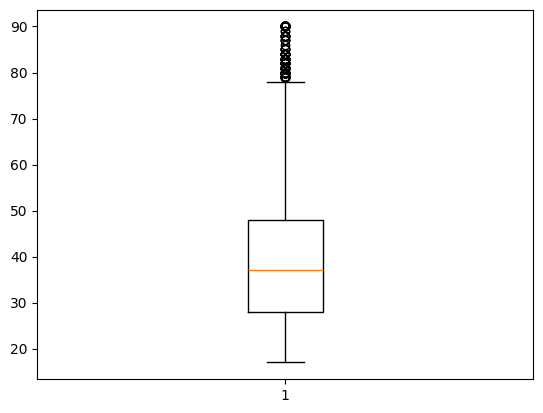

In [20]:
plt.boxplot(df['age'])
plt.show()

In [21]:
df=df[(df.age>=17) & (df.age<=75)]

In [22]:
df.workclass.value_counts()

,count
workclass,
Private,33756
Self-emp-not-inc,3796
Local-gov,3110
others,2700
State-gov,1979
Self-emp-inc,1669
Federal-gov,1428
Without-pay,21
Never-worked,10


In [23]:
from typing_extensions import Never
# in the above code 'without-pay and 'never-worked' having very less count as well as they are not earning
# so not required for income predictionb
# so we can remove such df
df=df[df['workclass']!='Without-pay']
df=df[df['workclass']!='Never-worked']
# df[df.workclass == 'Never-Worked']

In [24]:
df.workclass.value_counts()

,count
workclass,
Private,33756
Self-emp-not-inc,3796
Local-gov,3110
others,2700
State-gov,1979
Self-emp-inc,1669
Federal-gov,1428


In [25]:
df.education.value_counts()

,count
education,
HS-grad,15655
Some-college,10824
Bachelors,7983
Masters,2634
Assoc-voc,2053
11th,1801
Assoc-acdm,1592
10th,1373
7th-8th,899


In [26]:
# # here also we can eliminate some categories like '1st-4th','5th-6th','Preschool'
df=df[df['education']!='1st-4th']
df=df[df['education']!='5th-6th']
df=df[df['education']!='Preschool']

In [27]:
df.shape

(47619, 15)

In [28]:
# now the 'education' and 'education-num' are giving us same information so we will keep only one of them
# here i will remove the text df column 'education'
# Drop the text column
df.drop('education', axis=1, inplace=True)

df.columns

Index(['age', 'workclass', 'fnlwgt', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [29]:
df.tail()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [30]:
df.workclass

,workclass
0,Private
1,Private
2,Local-gov
3,Private
4,others
...,...
48837,Private
48838,Private
48839,Private
48840,Private


In [31]:
# from sklearn.preprocessing import LabelEncoder
# encoder=LabelEncoder()
# df['workclass']=encoder.fit_transform(df['workclass'])
# df['marital-status']=encoder.fit_transform(df['marital-status'])
# df['occupation']=encoder.fit_transform(df['occupation'])
# df['relationship']=encoder.fit_transform(df['relationship'])
# df['race']=encoder.fit_transform(df['race'])
# df['gender']=encoder.fit_transform(df['gender'])
# df['native-country']=encoder.fit_transform(df['native-country'])
# df

from sklearn.preprocessing import LabelEncoder
import joblib

# Define categorical columns
cat_cols = ['workclass', 'marital-status', 'occupation', 'relationship',
            'race', 'gender', 'native-country']

# Dictionary to store encoders
encoders = {}

# Apply label encoding and save each encoder
for col in cat_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    encoders[col] = encoder
    joblib.dump(encoder, f'{col}_encoder.pkl')  # Save the encoder
df

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,7,4,6,3,2,1,0,0,40,38,<=50K
1,38,2,89814,9,2,4,0,4,1,0,0,50,38,<=50K
2,28,1,336951,12,2,10,0,4,1,0,0,40,38,>50K
3,44,2,160323,10,2,6,0,2,1,7688,0,40,38,>50K
4,18,6,103497,10,4,14,3,4,0,0,0,30,38,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,12,2,12,5,4,0,0,0,38,38,<=50K
48838,40,2,154374,9,2,6,0,4,1,0,0,40,38,>50K
48839,58,2,151910,9,6,0,4,4,0,0,0,40,38,<=50K
48840,22,2,201490,9,4,0,3,4,1,0,0,20,38,<=50K


In [32]:
# X=df.drop(columns=['income'])
# Y=df['income']
# X
from sklearn.preprocessing import LabelEncoder
import joblib

# Encode the target (income column)
income_encoder = LabelEncoder()
df['income'] = income_encoder.fit_transform(df['income'])  # update df

# Save the encoder
joblib.dump(income_encoder, 'income_encoder.pkl')

# Now split features and labels
X = df.drop(columns=['income'])
Y = df['income']
Y

,income
0,0
1,0
2,1
3,1
4,0
...,...
48837,0
48838,1
48839,0
48840,0


In [33]:
from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# X=scaler.fit_transform(X)
# X

# Scale the features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [34]:
# from sklearn.model_selection import train_test_split
# xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=23,stratify=Y)
# # here random_state=True suggest that the records getting choosen for trainning
# # and testing will be in random order
# # statify=Y we use only for classification task
# # statify maintans the catagorical ratio in output column(Y) while getting choosen for trainning and testing

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=23,
    stratify=Y
)

# Explanation:
# random_state=23 → ensures reproducibility; same split each time you run
# stratify=Y     → keeps the proportion of income classes (<=50K, >50K) the same in both train and test


In [35]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import accuracy_score
# import joblib

# model = GradientBoostingClassifier()
# model.fit(xtrain, ytrain)

# y_pred = model.predict(xtest)
# acc = accuracy_score(ytest, y_pred)
# print(f"Gradient Boost Accuracy: {acc:.4f}")

# joblib.dump(model, "best_model.pkl")
# print("Saved Gradient Boost model as best_model.pkl")

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import joblib

# Initialize and train the Gradient Boosting Classifier
model = GradientBoostingClassifier()
model.fit(xtrain, ytrain)

# Predict on the test set
y_pred = model.predict(xtest)

# Calculate and display accuracy
acc = accuracy_score(ytest, y_pred)
print(f"Gradient Boost Accuracy: {acc:.4f}")

# Save the trained model
joblib.dump(model, "best_model.pkl")
print("Saved Gradient Boost model as best_model.pkl")


Gradient Boost Accuracy: 0.8597
Saved Gradient Boost model as best_model.pkl


In [36]:
df.sample(29)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
45150,51,0,198186,13,6,9,1,2,0,0,0,40,38,0
11077,38,2,198751,9,0,5,1,1,1,0,0,40,39,0
47389,25,6,161235,11,4,14,3,4,1,0,0,90,38,0
17796,44,2,123983,13,0,7,1,1,1,0,0,40,2,0
45020,36,2,93225,7,2,6,0,4,1,0,0,40,38,0
10872,43,2,169076,9,2,6,0,2,1,0,0,40,38,0
2493,47,1,319205,10,0,0,4,4,0,0,0,40,38,0
6609,48,2,149337,10,0,6,1,4,1,0,0,40,38,1
12739,46,2,107737,10,2,11,0,4,1,0,0,40,38,0
8416,42,5,179151,10,2,4,0,4,1,0,0,40,38,0


In [37]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)


Index([], dtype='object')


In [38]:
# %%writefile app.py
# import streamlit as st
# import pandas as pd
# import joblib

# # Load the trained model
# model = joblib.load("best_model.pkl")

# # Page configuration
# st.set_page_config(
#     page_title="Employee Salary Classification",
#     page_icon="💼",
#     layout="centered"
# )

# st.title("💼 Employee Salary Classification App")
# st.markdown("Predict whether an employee earns >50K or ≤50K based on input features.")

# # Sidebar inputs
# st.sidebar.header("Input Employee Details")

# # Input fields
# age = st.sidebar.slider("Age", 18, 65, 30)
# education = st.sidebar.selectbox("Education Level", [
#     "Bachelors", "Masters", "PhD", "HS-grad", "Assoc", "Some-college"
# ])
# occupation = st.sidebar.selectbox("Job Role", [
#     "Tech-support", "Craft-repair", "Other-service", "Sales", "Exec-managerial", "Prof-specialty"
# ])
# hours_per_week = st.sidebar.slider("Hours per week", 1, 80, 40)
# experience = st.sidebar.slider("Years of Experience", 0, 40, 5)

# # Create DataFrame for prediction
# input_data = pd.DataFrame({
#     "age": [age],
#     "education": [education],
#     "occupation": [occupation],
#     "hours-per-week": [hours_per_week],
#     "experience": [experience]
# })

# st.subheader("Input Data")
# st.write(input_data)

# # Prediction
# if st.button("Predict Salary Class"):
#     prediction = model.predict(input_data)[0]
#     st.success(f"Predicted Salary Class: {'>50K' if prediction == 1 else '<=50K'}")

# # Batch prediction
# st.subheader("Batch Prediction")
# uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type=["csv"])

# if uploaded_file is not None:
#     batch_data = pd.read_csv(uploaded_file)
#     st.write("Uploaded Data", batch_data)
#     batch_preds = model.predict(batch_data)
#     batch_data["Predicted Salary"] = [">50K" if pred == 1 else "<=50K" for pred in batch_preds]
#     st.write("Prediction Results", batch_data)


%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load model and preprocessing tools
model = joblib.load("best_model.pkl")
scaler = joblib.load("scaler.pkl")

# Load all necessary label encoders
encoders = {
    "workclass": joblib.load("workclass_encoder.pkl"),
    "marital-status": joblib.load("marital-status_encoder.pkl"),
    "occupation": joblib.load("occupation_encoder.pkl"),
    "relationship": joblib.load("relationship_encoder.pkl"),
    "race": joblib.load("race_encoder.pkl"),
    "gender": joblib.load("gender_encoder.pkl"),
    "native-country": joblib.load("native-country_encoder.pkl"),
    "income": joblib.load("income_encoder.pkl"),
}

# Page config
st.set_page_config(
    page_title="Employee Salary Classification",
    page_icon="💼",
    layout="centered"
)

st.title("💼 Employee Salary Classification App")
st.markdown("Predict whether an employee earns >50K or ≤50K based on input features.")

# Sidebar inputs
st.sidebar.header("Input Employee Details")

# Input fields
age = st.sidebar.slider("Age", 18, 65, 30)
workclass = st.sidebar.selectbox("Workclass", encoders["workclass"].classes_)
fnlwgt = st.sidebar.number_input("Fnlwgt", value=189664, step=1) # Using mean as default
# Instead of educational-num, use education string and map it back
education_options = {
    1: 'Preschool', 2: '1st-4th', 3: '5th-6th', 4: '7th-8th',
    5: '9th', 6: '10th', 7: '11th', 8: '12th', 9: 'HS-grad',
    10: 'Some-college', 11: 'Assoc-voc', 12: 'Assoc-acdm',
    13: 'Bachelors', 14: 'Masters', 15: 'Prof-school', 16: 'Doctorate'
}
# Filter out the education levels that were removed during preprocessing
valid_education_options = {v: k for k, v in education_options.items() if v not in ['1st-4th', '5th-6th', 'Preschool']}
education = st.sidebar.selectbox("Education Level", list(valid_education_options.keys()))
educational_num = valid_education_options[education]


marital_status = st.sidebar.selectbox("Marital Status", encoders["marital-status"].classes_)
occupation = st.sidebar.selectbox("Occupation", encoders["occupation"].classes_)
relationship = st.sidebar.selectbox("Relationship", encoders["relationship"].classes_)
race = st.sidebar.selectbox("Race", encoders["race"].classes_)
gender = st.sidebar.selectbox("Gender", encoders["gender"].classes_)
capital_gain = st.sidebar.number_input("Capital Gain", value=0, step=100)
capital_loss = st.sidebar.number_input("Capital Loss", value=0, step=100)
hours_per_week = st.sidebar.slider("Hours per Week", 1, 99, 40)
native_country = st.sidebar.selectbox("Native Country", encoders["native-country"].classes_)


# Encode categorical inputs
encoded_workclass = encoders["workclass"].transform([workclass])[0]
encoded_marital_status = encoders["marital-status"].transform([marital_status])[0]
encoded_occupation = encoders["occupation"].transform([occupation])[0]
encoded_relationship = encoders["relationship"].transform([relationship])[0]
encoded_race = encoders["race"].transform([race])[0]
encoded_gender = encoders["gender"].transform([gender])[0]
encoded_native_country = encoders["native-country"].transform([native_country])[0]


# Create input dataframe with all features used in training
input_df = pd.DataFrame([[
    age,
    encoded_workclass,
    fnlwgt,
    educational_num,
    encoded_marital_status,
    encoded_occupation,
    encoded_relationship,
    encoded_race,
    encoded_gender,
    capital_gain,
    capital_loss,
    hours_per_week,
    encoded_native_country
]], columns=[
    'age',
    'workclass',
    'fnlwgt',
    'educational-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'gender',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country'
])

# Scale input
scaled_input = scaler.transform(input_df)

st.subheader("Input Data")
st.write(input_df)

# Predict
if st.button("Predict Salary Class"):
    pred = model.predict(scaled_input)[0]
    result = encoders["income"].inverse_transform([pred])[0]
    st.success(f"Predicted Salary Class: {result}")

# Batch Prediction
st.subheader("Batch Prediction")
uploaded_file = st.file_uploader("Upload CSV for batch prediction", type=["csv"])

def process_batch_prediction(batch_df, encoders, scaler, model):
    # Encode batch data - handle potential missing columns in uploaded CSV
    for col, encoder in encoders.items():
        if col in batch_df.columns:
            # Check if all values in the batch column exist in the encoder's classes
            if all(item in encoder.classes_ for item in batch_df[col].unique()):
                batch_df[col] = encoder.transform(batch_df[col])
            else:
                st.warning(f"Column '{col}' in uploaded CSV contains values not seen during training. These rows may not be predicted accurately.")
                # Option 1: Drop rows with unseen values
                # batch_df = batch_df[batch_df[col].isin(encoder.classes_)]
                # Option 2: Impute unseen values (e.g., with the mode)
                # mode_value = batch_df[col].mode()[0] # Or encoder.classes_[0]
                # batch_df[col] = batch_df[col].apply(lambda x: encoder.transform([mode_value])[0] if x not in encoder.classes_ else encoder.transform([x])[0])
                # For simplicity here, we'll just proceed and let the transform potentially raise errors or produce unexpected results for unseen values.
                # A more robust app would handle this more gracefully.
                try:
                    batch_df[col] = encoder.transform(batch_df[col])
                except ValueError as e:
                    st.error(f"Error encoding column '{col}': {e}. Please ensure your CSV contains valid values for this column.")
                    return None # Return None to indicate an error


    # Ensure all expected columns are present in the batch data before scaling
    expected_cols = scaler.feature_names_in_ # Assuming scaler has this attribute after fitting
    missing_cols = set(expected_cols) - set(batch_df.columns)
    for c in missing_cols:
        batch_df[c] = 0 # Add missing columns with a default value (e.g., 0)

    # Reorder columns to match training data
    batch_df = batch_df[expected_cols]

    # Scale batch data
    batch_scaled = scaler.transform(batch_df)

    # Predict
    batch_preds = model.predict(batch_scaled)
    batch_df['Predicted Salary'] = encoders["income"].inverse_transform(batch_preds)

    return batch_df


if uploaded_file is not None:
    batch_df = pd.read_csv(uploaded_file)
    st.write("Uploaded Data", batch_df)
    prediction_results = process_batch_prediction(batch_df, encoders, scaler, model)
    if prediction_results is not None:
        st.write("Prediction Results", prediction_results)

Writing app.py


In [39]:
!pip install streamlit pyngrok

In [46]:
# df.education.value_counts()

In [40]:
!ngrok config add-authtoken 30AYfC9FYZ1J5BLr1Lw9ziXsb3D_4TZAAMfW1Wr2wSPTGbxGW

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [41]:
import os
import threading

def run_streamlit():
    os.system('streamlit run app.py --server.port 8501')

thread = threading.Thread(target=run_streamlit)
thread.start()


In [42]:
from pyngrok import ngrok
import time

time.sleep(5)  # Wait to ensure Streamlit server has started

public_url = ngrok.connect(8501)  # Open tunnel
print("Your Streamlit app is live here:", public_url)

Your Streamlit app is live here: NgrokTunnel: "https://1b473d795003.ngrok-free.app" -> "http://localhost:8501"
